# What data do we want to pull from the census API?

In [38]:
from census import Census

In [39]:
c = Census("22ca33020c76ab3a9df443a7f7a0ec160fcd50d5")
c.acs5.get(('NAME', 'B19001H_007E'),
          {'for': 'state:{}'.format(states.UT.fips)})

[{'NAME': 'Utah', 'B19001H_007E': 32805.0, 'state': '49'}]

In [40]:
c.sf1.state_county_tract('NAME', states.UT.fips, '17', Census.ALL)

[{'NAME': 'Census Tract 3', 'state': '49', 'county': '017', 'tract': '000300'},
 {'NAME': 'Census Tract 4', 'state': '49', 'county': '017', 'tract': '000400'}]

In [41]:
c.acs5.state('NAME', '49')

[{'NAME': 'Utah', 'state': '49'}]

# Here we're working with the UT shapefiles

In [42]:
import urllib.request
from zipfile import ZipFile
import pycurl
import geopandas as gpd
from io import BytesIO
from us import states

In [7]:
states.UT.shapefile_urls()

{'tract': 'https://www2.census.gov/geo/tiger/TIGER2010/TRACT/2010/tl_2010_49_tract10.zip',
 'cd': 'https://www2.census.gov/geo/tiger/TIGER2010/CD/111/tl_2010_49_cd111.zip',
 'county': 'https://www2.census.gov/geo/tiger/TIGER2010/COUNTY/2010/tl_2010_49_county10.zip',
 'state': 'https://www2.census.gov/geo/tiger/TIGER2010/STATE/2010/tl_2010_49_state10.zip',
 'zcta': 'https://www2.census.gov/geo/tiger/TIGER2010/ZCTA5/2010/tl_2010_49_zcta510.zip',
 'block': 'https://www2.census.gov/geo/tiger/TIGER2010/TABBLOCK/2010/tl_2010_49_tabblock10.zip',
 'blockgroup': 'https://www2.census.gov/geo/tiger/TIGER2010/BG/2010/tl_2010_49_bg10.zip'}

In [22]:
# save tract url as zip
with open('tract.zip', 'wb') as f:
    c = pycurl.Curl()
    c.setopt(c.URL, states.UT.shapefile_urls()['tract'])
    c.setopt(c.WRITEDATA, f)
    c.perform()
    c.close()

In [33]:
#extract all files from zip
with ZipFile('tract.zip', 'r') as myzip:
    myzip.extractall()

In [36]:
import geopandas as gpd
utah = gpd.read_file("tl_2010_49_tract10.shp")

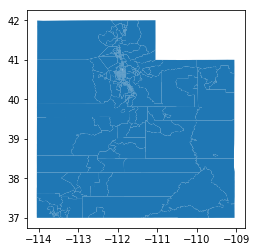

In [37]:
from IPython.display import display

utah.plot()